# 1. Importing the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data=pd.read_csv("job_descriptions.csv")

In [2]:
data.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [3]:
print(data.shape)

(1615940, 23)


In [4]:
# Reduce the number of rows to around 3000
data = data.sample(n=300000, random_state=1)

In [5]:
print(data.columns)

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1451761 to 1355057
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Job Id            300000 non-null  int64  
 1   Experience        300000 non-null  object 
 2   Qualifications    300000 non-null  object 
 3   Salary Range      300000 non-null  object 
 4   location          300000 non-null  object 
 5   Country           300000 non-null  object 
 6   latitude          300000 non-null  float64
 7   longitude         300000 non-null  float64
 8   Work Type         300000 non-null  object 
 9   Company Size      300000 non-null  int64  
 10  Job Posting Date  300000 non-null  object 
 11  Preference        300000 non-null  object 
 12  Contact Person    300000 non-null  object 
 13  Contact           300000 non-null  object 
 14  Job Title         300000 non-null  object 
 15  Role              300000 non-null  object 
 16  Job Portal        

# Cleaning the data 

In [7]:
# checking for missing values 
data.isna().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     1028
dtype: int64

In [8]:
# Dropping unnecessary variables 
# Drop unnecessary columns
unnecessary_columns = ['Job Id', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 
                       'Work Type', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 
                       'Role', 'Job Portal', 'Benefits', 'Company', 'Company Profile']

data.drop(columns=unnecessary_columns, inplace=True)


In [9]:
data.head(1)

,Experience,Qualifications,Company Size,Job Title,Job Description,skills,Responsibilities
1451761,1 to 9 Years,BA,96517,Human Resources Manager,Talent Acquisition Managers oversee the recrui...,Talent sourcing Interviewing Onboarding Recrui...,"Lead talent acquisition efforts, including sou..."


# pre-processing the data 

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download stopwords and initialize lemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# text preprocessing
def preprocess_text(text):
    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing stopwords and lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Feature Engineering

In [11]:
# Apply preprocessing to relevant columns and concatenate text
data['Combined_Text'] = data['Job Description'] + ' ' + data['Responsibilities'] + ' ' + data['skills']
data['Combined_Text'] = data['Combined_Text'].apply(preprocess_text)

# Feature extraction
# TF-IDF vectorization for combined text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text = tfidf_vectorizer.fit_transform(data['Combined_Text']).toarray()

# Encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Job Title'])


# Model training 

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic regression Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_y_pred))

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_y_pred))

Logistic regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       394
           2       1.00      1.00      1.00       531
           3       1.00      1.00      1.00       377
           4       1.00      1.00      1.00       676
           5       1.00      1.00      1.00       356
           6       1.00      1.00      1.00       495
           7       1.00      1.00      1.00       232
           8       1.00      1.00      1.00       395
           9       1.00      1.00      1.00       427
          10       1.00      1.00      1.00       277
          11       1.00      1.00      1.00       388
          12       1.00      1.00      1.00       381
          13       1.00      1.00      1.00       396
          14       1.00      1.00      1.00       413
          15       1.00      1.00      1.00       422
          16       1.00      1.00      1.00    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       394
           2       1.00      1.00      1.00       531
           3       1.00      1.00      1.00       377
           4       1.00      1.00      1.00       676
           5       1.00      1.00      1.00       356
           6       1.00      1.00      1.00       495
           7       1.00      1.00      1.00       232
           8       1.00      1.00      1.00       395
           9       1.00      1.00      1.00       427
          10       1.00      1.00      1.00       277
          11       1.00      1.00      1.00       388
          12       1.00      1.00      1.00       381
          13       1.00      1.00      1.00       396
          14       1.00      1.00      1.00       413
          15       1.00      1.00      1.00       422
          16       1.00      1.00      1.00       383
          17       1.00    

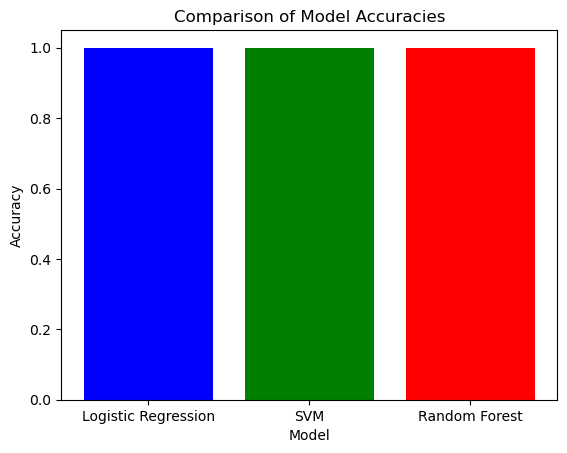

In [13]:
import matplotlib.pyplot as plt

# Assuming that the accuracy of the models are stored in the variables `accuracy`, `svm_accuracy`, and `rf_accuracy`

# Create a list of the accuracies
accuracies = [accuracy, svm_accuracy, rf_accuracy]

# Create a list of the model names
models = ['Logistic Regression', 'SVM', 'Random Forest']

# Create a bar plot
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Add title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


# Testing the model 

In [14]:
# Let's say we have a new individual with the following skills, responsibilities, and job description
individual_skills = "Talent sourcing Interviewing Onboarding Recruiting"
individual_responsibilities = "Lead talent acquisition efforts, including sourcing"
individual_job_description = "Talent Acquisition Managers oversee the recruitment"

# We need to preprocess the text and convert it to the format that our model expects
individual_combined_text = individual_job_description + ' ' + individual_responsibilities + ' ' + individual_skills
individual_combined_text = preprocess_text(individual_combined_text)

# Convert the text to TF-IDF vectors
individual_X = tfidf_vectorizer.transform([individual_combined_text]).toarray()

# Use the Random Forest model to predict the job title
individual_y_pred = rf_model.predict(individual_X)

# The model's prediction is in the form of a label-encoded integer, so we need to transform it back to the original job title
individual_job_title_pred = label_encoder.inverse_transform(individual_y_pred)

# Print the predicted job title
print(f"The predicted job title for the individual is: {individual_job_title_pred[0]}")


The predicted job title for the individual is: Human Resources Manager


In [15]:
import pickle

# Save the Random Forest model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


In [16]:
import sys
import pickle
import numpy as np
import pandas as pd
import sklearn
import streamlit
import warnings
warnings.filterwarnings('ignore')

def print_current_versions():
    print("\nCurrent Environment Versions:")
    print("-" * 50)
    print(f"Python: {sys.version.split()[0]}")
    print(f"NumPy: {np.__version__}")
    print(f"Pandas: {pd.__version__}")
    print(f"Scikit-learn: {sklearn.__version__}")
    print(f"Streamlit: {streamlit.__version__}")

def check_pickle_version(file_path):
    try:
        print(f"\nChecking pickle file: {file_path}")
        print("-" * 50)
        with open(file_path, 'rb') as file:
            # Get the pickle protocol version
            pickle_protocol = pickle.load(file)
            print(f"Pickle protocol version: {pickle.HIGHEST_PROTOCOL}")
            
            # Try to get sklearn version if it's a sklearn model
            if hasattr(pickle_protocol, '_sklearn_version'):
                print(f"Scikit-learn version used for pickling: {pickle_protocol._sklearn_version}")
            
    except Exception as e:
        print(f"Error reading {file_path}: {str(e)}")

def main():
    # Print current versions
    print_current_versions()
    
    # Check each pickle file
    pickle_files = ['rf_model.pkl', 'tfidf_vectorizer.pkl', 'label_encoder.pkl']
    for file in pickle_files:
        check_pickle_version(file)

if __name__ == "__main__":
    main()


Current Environment Versions:
--------------------------------------------------
Python: 3.11.5
NumPy: 1.24.3
Pandas: 2.0.3
Scikit-learn: 1.2.2
Streamlit: 1.33.0

Checking pickle file: rf_model.pkl
--------------------------------------------------
Pickle protocol version: 5

Checking pickle file: tfidf_vectorizer.pkl
--------------------------------------------------
Pickle protocol version: 5

Checking pickle file: label_encoder.pkl
--------------------------------------------------
Pickle protocol version: 5
